<a href="https://colab.research.google.com/github/wozzin/AI_ML/blob/main/LinearRegression_boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd                                    

#### LinearRegression 실습 04

보스턴 집값 데이터셋 구성
- 506개의 데이터
- 13개의 정보와 1개의 클래스로 구성
```
0 CRIM : 인구 1인당 범죄 발생 수
1 ZN : 25,000평방 피트 이상의 주거 구역 비중
2 INDUS : 소매업 외 상업이 차지하는 면적 비율
3 CHAS : 찰스강 위치 변수 (1: 강 주변, 0: 이외)
4 NOX : 일산화질소 농도
5 RM : 집의 평균 방 수
6 AGE : 1940년 이전 지어진 비율
7 DIS : 5가지 보스턴 시 고용 시설까지의 거리
8 RAD : 순환고속도로의 접근 용이성
9 TAX : $10,000당 부동산 세율 총계
10 PTRATIO : 지역별 학생과 교사 비율
11 B : 지역별 흑인 비율
12 LSTAT : 급여가 낮은 직업에 종사하는 인구 비율 (%)
13 MEDV : 가격 (단위 : $1,000)
```

In [4]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()
boston.data.shape

(506, 13)

In [10]:
# 데이터 세트 DataFrame 변환
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [11]:
# 훈련 데이터와 테스트 데이터 준비
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [12]:
# 모델 선택과 학습
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print('훈련 점수:', model.score(X_train, y_train) )
print('테스트 점수:', model.score(X_test, y_test) )

훈련 점수: 0.7697699488741149
테스트 점수: 0.635463843320211


In [17]:
# 예측/평가
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_score = r2_score(y_test, y_pred)
mse, rmse, r2_score

print(f'MSE={mse:.3f}, RMSE={rmse:.3f}, R2SCROE={r2_score:.3f}')

MSE=29.782, RMSE=5.457, R2SCROE=0.635


In [23]:
print("가중치(계수, 기울기 파라미터 W) :", np.round(model.coef_, 1))
print("편향(절편 파라미터 b) :", model.intercept_)  

# 특성(피처)별 회귀 계수 값 순으로 출력
coeff = pd.Series(data=np.round(model.coef_,1), index=X.columns)
coeff.sort_values()

가중치(계수, 기울기 파라미터 W) : [ -0.1   0.   -0.    2.4 -15.6   3.8  -0.   -1.4   0.2  -0.   -1.    0.
  -0.5]
편향(절편 파라미터 b) : 36.93325545712031


NOX       -15.6
DIS        -1.4
PTRATIO    -1.0
LSTAT      -0.5
CRIM       -0.1
ZN          0.0
INDUS      -0.0
AGE        -0.0
TAX        -0.0
B           0.0
RAD         0.2
CHAS        2.4
RM          3.8
dtype: float64

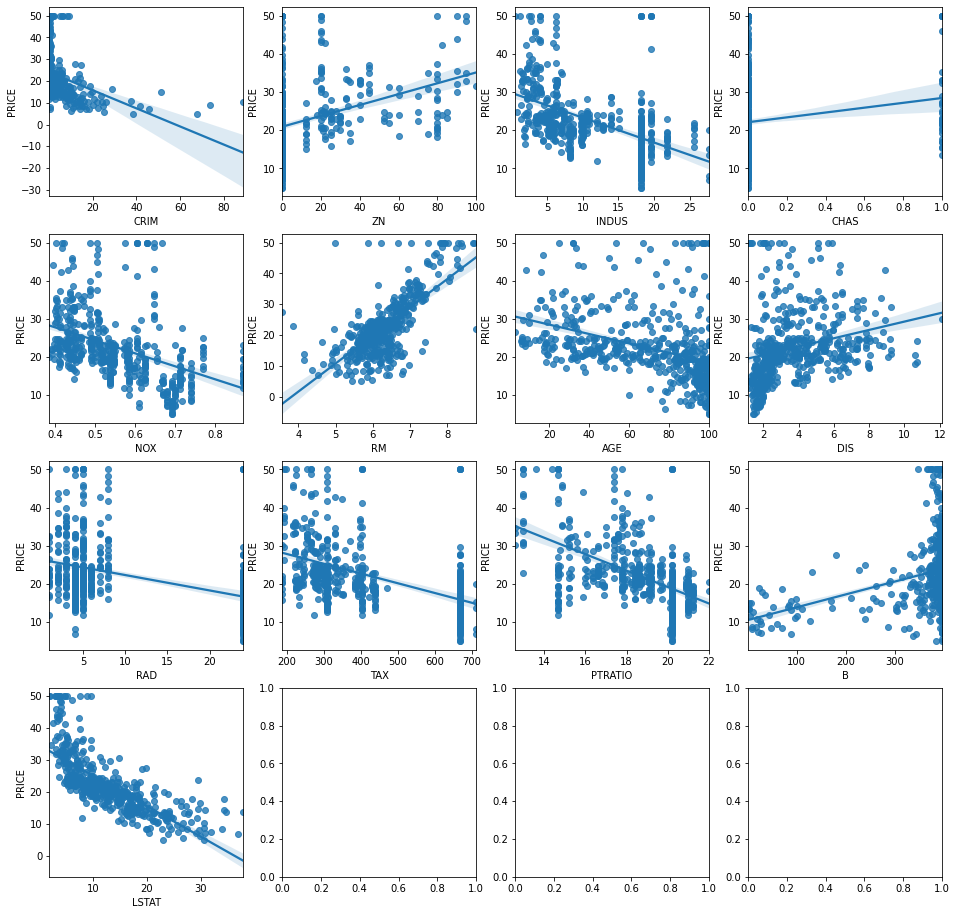

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
# 데이터 조사
# 시각화
# 4행 4열, axes는 4x4 개의 ax를 갖음
# 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
fig, axes = plt.subplots(4,4, figsize = (16, 16))
for i , feature in enumerate(X.columns):
  row = int(i /4)
  col = i % 4
  sns.regplot(x = feature, y = 'PRICE', data=df, ax=axes[row][col])
